- Danceability: a metric for determining how "danceable" a song is.
- Energy: a subjective assessment of activity and intensity.
- Instrumentality: whether or not a song has no vocals (pure instrumental).
- Liveness: refers to the presence of an audience in a song, such as at a performance.
- Loudness: The decibel level of a song.
- Mode: Minor or Major mode.
- Speechiness: in a song, the presence of words.
- Tempo: Beats per minute (BPM)

In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 

In [158]:
df = pd.read_csv("data/combine.csv")
df.head()

,artist_id,artist_name,album_id,album_name,genres,followers,popularity,link_image,url,album_type,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,00AFbqxvdDK6T1D6MQZ9c1,GLAY,0rWkjySGI1Ttr4MS7xTQNA,rare collectives vol.4,classic j-pop,590825,56,https://i.scdn.co/image/ab6761610000e5ebc20088...,https://open.spotify.com/artist/00AFbqxvdDK6T1...,album,...,4,-10.697,1,0.0315,0.9520,0.000175,0.104,0.250,74.979,4
1,00AFbqxvdDK6T1D6MQZ9c1,GLAY,0rWkjySGI1Ttr4MS7xTQNA,rare collectives vol.4,j-pop,590825,56,https://i.scdn.co/image/ab6761610000e5ebc20088...,https://open.spotify.com/artist/00AFbqxvdDK6T1...,album,...,4,-10.697,1,0.0315,0.9520,0.000175,0.104,0.250,74.979,4
2,00PLVqZ4oaOmbI4lacLUBO,Stiftelsen,6vYiIkw80Btuehht8d0C8n,Allting låter som Slipknot,classic swedish pop,237999,53,https://i.scdn.co/image/ab6761610000e5eb9fd5de...,https://open.spotify.com/artist/00PLVqZ4oaOmbI...,album,...,0,-6.164,1,0.0476,0.0448,0.000033,0.122,0.330,139.978,4
3,00FQb4jTyendYWaN8pK0wa,Lana Del Rey,0Dt3FbpMQwjoT5KNAw0IXR,Born To Die – Paradise Edition (Special Version),art pop,40266213,92,https://i.scdn.co/image/ab6761610000e5ebb99cac...,https://open.spotify.com/artist/00FQb4jTyendYW...,album,...,0,-5.520,1,0.0340,0.1280,0.000002,0.383,0.189,93.763,4
4,00FQb4jTyendYWaN8pK0wa,Lana Del Rey,0Dt3FbpMQwjoT5KNAw0IXR,Born To Die – Paradise Edition (Special Version),pop,40266213,92,https://i.scdn.co/image/ab6761610000e5ebb99cac...,https://open.spotify.com/artist/00FQb4jTyendYW...,album,...,0,-5.520,1,0.0340,0.1280,0.000002,0.383,0.189,93.763,4


In [159]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
followers,1133.0,1.328143e+07,1.857433e+07,941.000000,590825.0000,590825.000000,4.026621e+07,4.026621e+07
popularity,1133.0,6.558694e+01,2.010385e+01,14.000000,56.0000,56.000000,9.200000e+01,9.200000e+01
total_tracks,1133.0,1.585260e+01,5.343037e+00,4.000000,11.0000,14.000000,2.100000e+01,2.500000e+01
danceability,1133.0,4.510124e-01,1.320411e-01,0.119000,0.3520,0.456000,5.440000e-01,9.320000e-01
energy,1133.0,6.793259e-01,2.637459e-01,0.018700,0.4920,0.739000,9.100000e-01,9.950000e-01
key,1133.0,4.894086e+00,3.734011e+00,0.000000,2.0000,4.000000,9.000000e+00,1.100000e+01
loudness,1133.0,-6.854836e+00,3.957168e+00,-28.076000,-8.3460,-5.912000,-4.304000e+00,4.400000e-01
mode,1133.0,6.751986e-01,4.685074e-01,0.000000,0.0000,1.000000,1.000000e+00,1.000000e+00
speechiness,1133.0,5.873504e-02,4.637692e-02,0.024500,0.0329,0.042100,6.470000e-02,4.140000e-01
acousticness,1133.0,2.926484e-01,3.400177e-01,0.000005,0.0100,0.114000,5.420000e-01,9.890000e-01


In [160]:
df.drop(['album_type', 'release_date_precision'], axis = 1, inplace = True)

### Exploratory Data Analysis (EDA)

- Best Playlist

In [161]:
df['followers'].max()

40266213

In [162]:
best_playlist = df[df['followers'] == 40266213]['artist_name']
print("Best PLaylist\n", best_playlist)
df[df['followers'] == 40266213]

Best PLaylist
 3       Lana Del Rey
4       Lana Del Rey
5       Lana Del Rey
6       Lana Del Rey
9       Lana Del Rey
            ...     
1100    Lana Del Rey
1102    Lana Del Rey
1103    Lana Del Rey
1112    Lana Del Rey
1113    Lana Del Rey
Name: artist_name, Length: 364, dtype: object


,artist_id,artist_name,album_id,album_name,genres,followers,popularity,link_image,url,total_tracks,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
3,00FQb4jTyendYWaN8pK0wa,Lana Del Rey,0Dt3FbpMQwjoT5KNAw0IXR,Born To Die – Paradise Edition (Special Version),art pop,40266213,92,https://i.scdn.co/image/ab6761610000e5ebb99cac...,https://open.spotify.com/artist/00FQb4jTyendYW...,24,...,0,-5.520,1,0.0340,0.1280,0.000002,0.3830,0.1890,93.763,4
4,00FQb4jTyendYWaN8pK0wa,Lana Del Rey,0Dt3FbpMQwjoT5KNAw0IXR,Born To Die – Paradise Edition (Special Version),pop,40266213,92,https://i.scdn.co/image/ab6761610000e5ebb99cac...,https://open.spotify.com/artist/00FQb4jTyendYW...,24,...,0,-5.520,1,0.0340,0.1280,0.000002,0.3830,0.1890,93.763,4
5,00FQb4jTyendYWaN8pK0wa,Lana Del Rey,5VoeRuTrGhTbKelUfwymwu,Born To Die - The Paradise Edition,art pop,40266213,92,https://i.scdn.co/image/ab6761610000e5ebb99cac...,https://open.spotify.com/artist/00FQb4jTyendYW...,23,...,6,-9.595,0,0.0348,0.8110,0.000001,0.0870,0.1810,72.847,5
6,00FQb4jTyendYWaN8pK0wa,Lana Del Rey,5VoeRuTrGhTbKelUfwymwu,Born To Die - The Paradise Edition,pop,40266213,92,https://i.scdn.co/image/ab6761610000e5ebb99cac...,https://open.spotify.com/artist/00FQb4jTyendYW...,23,...,6,-9.595,0,0.0348,0.8110,0.000001,0.0870,0.1810,72.847,5
9,00FQb4jTyendYWaN8pK0wa,Lana Del Rey,5VoeRuTrGhTbKelUfwymwu,Born To Die - The Paradise Edition,art pop,40266213,92,https://i.scdn.co/image/ab6761610000e5ebb99cac...,https://open.spotify.com/artist/00FQb4jTyendYW...,23,...,1,-9.570,0,0.0297,0.0980,0.000273,0.1290,0.0379,100.024,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1100,00FQb4jTyendYWaN8pK0wa,Lana Del Rey,2DpEBrjCur1ythIZ10gJWw,Honeymoon,pop,40266213,92,https://i.scdn.co/image/ab6761610000e5ebb99cac...,https://open.spotify.com/artist/00FQb4jTyendYW...,14,...,7,-10.088,1,0.0314,0.9750,0.018700,0.0988,0.0898,102.031,1
1102,00FQb4jTyendYWaN8pK0wa,Lana Del Rey,2DpEBrjCur1ythIZ10gJWw,Honeymoon,art pop,40266213,92,https://i.scdn.co/image/ab6761610000e5ebb99cac...,https://open.spotify.com/artist/00FQb4jTyendYW...,14,...,5,-13.265,0,0.0360,0.9530,0.008280,0.1110,0.1730,74.847,3
1103,00FQb4jTyendYWaN8pK0wa,Lana Del Rey,2DpEBrjCur1ythIZ10gJWw,Honeymoon,pop,40266213,92,https://i.scdn.co/image/ab6761610000e5ebb99cac...,https://open.spotify.com/artist/00FQb4jTyendYW...,14,...,5,-13.265,0,0.0360,0.9530,0.008280,0.1110,0.1730,74.847,3
1112,00FQb4jTyendYWaN8pK0wa,Lana Del Rey,7xYiTrbTL57QO0bb4hXIKo,Lust For Life,art pop,40266213,92,https://i.scdn.co/image/ab6761610000e5ebb99cac...,https://open.spotify.com/artist/00FQb4jTyendYW...,16,...,1,-8.570,1,0.1260,0.0155,0.000020,0.1990,0.1370,134.981,4


- Checking which artists are featured most across all playlists for top 10 Artists

In [163]:
df['artist_name'].value_counts()

artist_name
GLAY                608
Lana Del Rey        364
Stiftelsen           55
Samar Singh          33
Gould Piano Trio     31
ឆន សុវណ្ណរាជ         29
Hernan Sepulveda     13
Name: count, dtype: int64

C:\Users\ngmin\AppData\Local\Temp\ipykernel_21280\4269999435.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 0, 'Total songs across playlists')

C:\Users\ngmin\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning:

Glyph 6022 (\N{KHMER LETTER CHA}) missing from font(s) Arial.

C:\Users\ngmin\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning:

Glyph 6035 (\N{KHMER LETTER NO}) missing from font(s) Arial.

C:\Users\ngmin\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning:

Glyph 6047 (\N{KHMER LETTER SA}) missing from font(s) Arial.

C:\Users\ngmin\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning:

Glyph 6075 (\N{KHMER VOWEL SIGN U}) missing from font(s) Arial.

C:\Users\ngmin\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning:

Glyph 6044 (\N{KHMER LETTER VO}) missing from font(s) Arial.

C:\Users\ngmin\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning:

Glyph 6030 (\N{KHMER LETTER NNO}) missing from font(s) Arial.

C:\Us

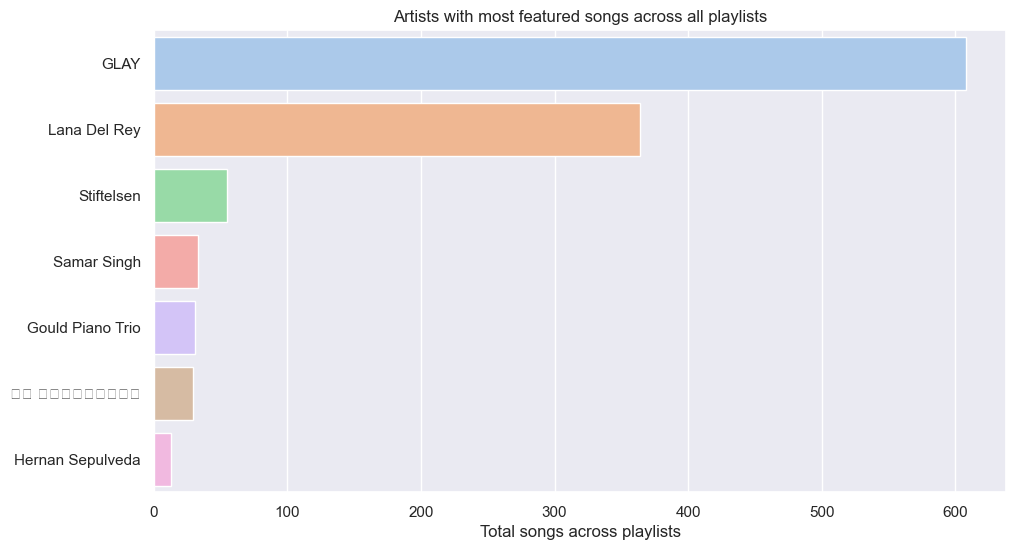

In [164]:
values = list(df['artist_name'].value_counts()) # take the number of each artist
names = df['artist_name'].value_counts().index.tolist() # take the name of each artist

ax = sns.barplot(y = names[0:7], x = values[0:7], palette="pastel")
ax.set_title('Artists with most featured songs across all playlists')
ax.set_xlabel('Total songs across playlists')

# Vì ở đây đang làm với dữ liệu nhỏ chỉ có 7 thằng vào dữ liệu chính sẽ chỉnh lại 10 thằng

- Checking the distribution of song durations

In [165]:
# df['duration_sec'] = df['duration_ms'] / 1000
# plt.title('Most songs across playlists are between 3-4 minutes')
# plt.xlabel('Song Duration (sec)')
# plt.ylabel('Count')
# plt.hist(df.drop_duplicates(['duration_ms'], keep = 'first')['duration_sec'], bins = 100)
# plt.xlim(0, 500)
# plt.show()

- Music Over Time

In [166]:
# Take the year of the column 'release_date'
df['release_date'] = pd.to_datetime(df['release_date'])

df['year'] = df['release_date'].dt.year

df.drop('release_date', axis = 1, inplace = True)

C:\Users\ngmin\AppData\Local\Temp\ipykernel_21280\1108978548.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\ngmin\AppData\Local\Temp\ipykernel_21280\1108978548.py:10: UserWarning:

The palette list has more values (9) than needed (4), which may not be intended.



<Axes: xlabel='decade', ylabel='count'>

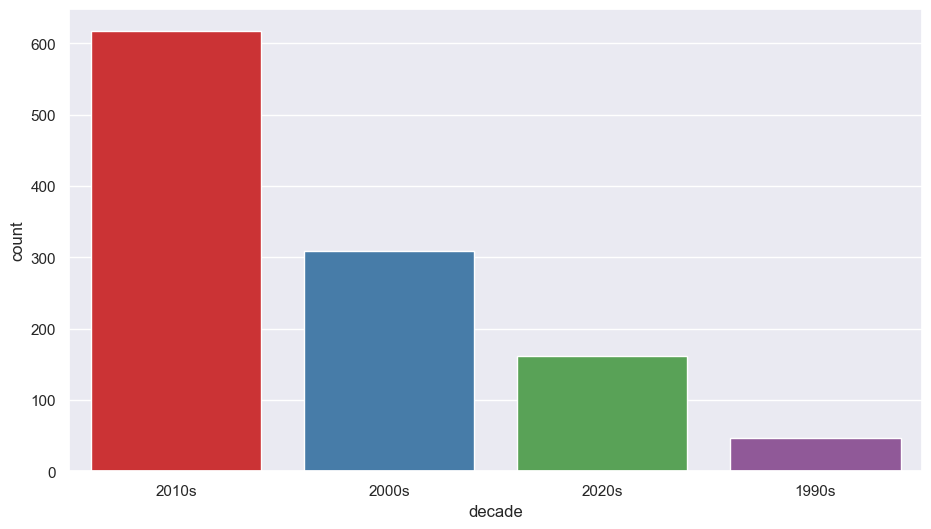

In [167]:
def get_decade(year):
    period_start = int(year/10) * 10
    decade = '{}s'.format(period_start)
    return decade

df['decade'] = df['year'].apply(get_decade)

custom = sns.color_palette("Set1") # set colors for each bar
sns.set(rc = {'figure.figsize': (11, 6)})
sns.countplot(x = df['decade'], palette= custom)

# most of musics, nowadays, are belongs to 2010s -> music market is developing day by day -> users have a tendancy to listen modern musics more, or can call Gen-z musics

- Characteristic of Different Genres

In [168]:
# Sắp xếp cá genre theo popularity top 10 genre
top10_gernes = df.sort_values('popularity', ascending=False).drop_duplicates('genres').head(10)

# Increase the width and plot
fig = px.bar(
    top10_gernes,
    x='genres',
    y=['valence', 'danceability', 'energy', 'instrumentalness', 'acousticness'],
    barmode='group',
    width=1200
)

# Xoay nhãn trục x để dễ đọc
fig.update_layout(
    xaxis=dict(tickangle=-45),
    title="Top 10 Genres by Popularity",
    xaxis_title="Genres",
    yaxis_title="Scores"
)
fig.show()

# According to the audio features for different songs along with that for different genres -> It will help to compare different genres and understand their unique differences in sound  

- Word Cloud of Artists

In [169]:
artist_counts = df['artist_name'].value_counts()

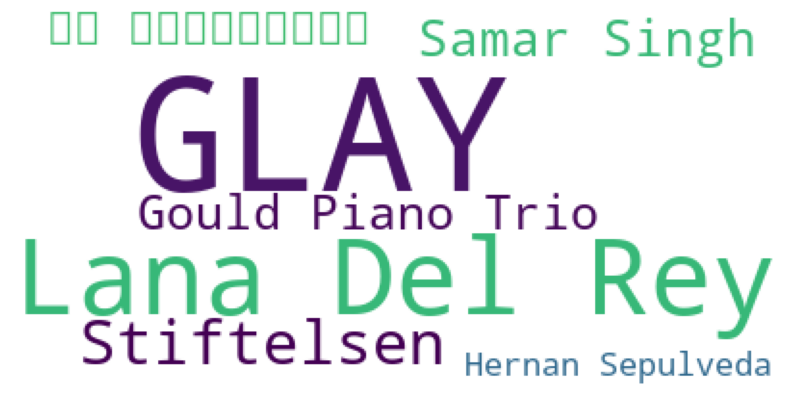

In [170]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

text = artist_counts

# create and generate a word cloud image:
wc = WordCloud(background_color= 'white',).generate_from_frequencies(text)

# display the generated image:
plt.figure( figsize=(10,5))
plt.imshow(wc)
plt.axis("off")
plt.show()

- Top 10 artists and music genres are most popular in the world

In [171]:
pd.pivot_table(df, index='artist_name', values='followers', aggfunc='sum').sort_values(by='followers', ascending=False)

,followers
artist_name,
Lana Del Rey,14656901532
GLAY,359221600
Samar Singh,18419379
Stiftelsen,13089945
Hernan Sepulveda,103519
ឆន សុវណ្ណរាជ,99731
Gould Piano Trio,29171


In [172]:
pd.pivot_table(df, index = 'genres', values= 'popularity', aggfunc = 'sum').sort_values(by='popularity', ascending = False)

,popularity
genres,
classic j-pop,17024
j-pop,17024
art pop,16744
pop,16744
classic swedish pop,2915
bhojpuri pop,2046
cambodian pop,638
classical piano trio,434


- Clustering my data to see more clearly

In [173]:
df.columns

Index(['artist_id', 'artist_name', 'album_id', 'album_name', 'genres',
       'followers', 'popularity', 'link_image', 'url', 'total_tracks',
       'track_id', 'name', 'preview', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 'year', 'decade'],
      dtype='object')

In [174]:
df_tmp = df.drop(['preview', 'artist_id', 'album_id', 'track_id', 'link_image', 'url', 'decade'], axis = 1)

In [175]:
df_tmp.dropna(inplace = True)

In [179]:
df_numeric = df_tmp.select_dtypes(include= ['float64', 'int64'])

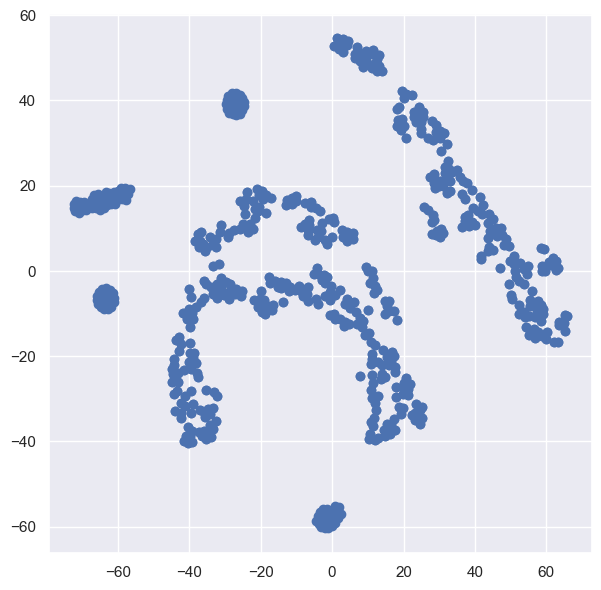

In [180]:
from sklearn.manifold import TSNE

model = TSNE(n_components= 2, random_state= 42)
tsne_data = model.fit_transform(df_numeric)
plt.figure(figsize = (7, 7))
plt.scatter(tsne_data[:,0], tsne_data[:,1])
plt.show()